Heigon Soldera 217638
Rafael Galib 204904

In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, tree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Carregando dataset do sklearn

In [48]:
digits = load_digits()

# Verificando o tamanho do data e target

In [49]:
print("Digits Data Shape", digits.data.shape)
print("Target Data Shape", digits.target.shape)

Digits Data Shape (1797, 64)
Target Data Shape (1797,)


# Visualizando as 10 primeiras imagens

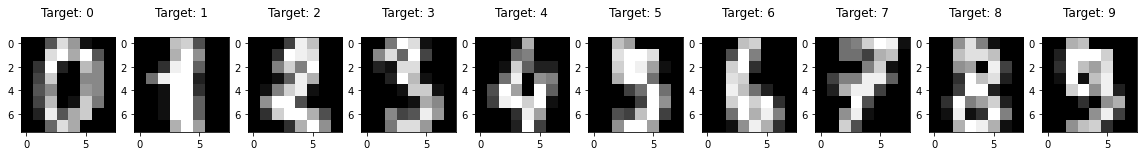

In [50]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Target: %i\n' % label, fontsize = 12)

# Separando em treino e teste os digitos e os targets

In [51]:
DigitsTrain, DigitsTest, TargetTrain, TargetTest = train_test_split(digits.data, digits.target, test_size=0.1, random_state=1)

# Aplicando regressão logistica direto da erro

In [52]:
logisticRegr = LogisticRegression()
logisticRegr.fit(DigitsTrain, TargetTrain)

/home/heigon77/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Criando pipeine com um padronizador de escala (preprocessamento) e treinando a regressão logistica

In [53]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe = pipe.fit(DigitsTrain, TargetTrain)

# Cross Validation

In [54]:
scores = cross_val_score(pipe, DigitsTrain, TargetTrain, cv=6)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.98148148 0.95185185 0.97777778 0.96654275 0.97769517 0.95167286]


(0.9516728624535316, 0.967836981963376, 0.9814814814814815)

# Predizendo valores para o dataset de teste

In [55]:
predictions = pipe.predict(DigitsTest)

# Verificando a acurácia

In [56]:
accuracy = pipe.score(DigitsTest, TargetTest)
print("%.2f%%" % (accuracy*100))

97.78%


# Criando matriz de confusão

In [57]:
cm = metrics.confusion_matrix(TargetTest, predictions)
print(cm)

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  1]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  1  0  0 14  0]
 [ 0  0  0  0  0  1  0  0  0 10]]


# Matriz de confusão bonita

Text(0.5, 1.0, 'Accuracy Score: 97.78%')

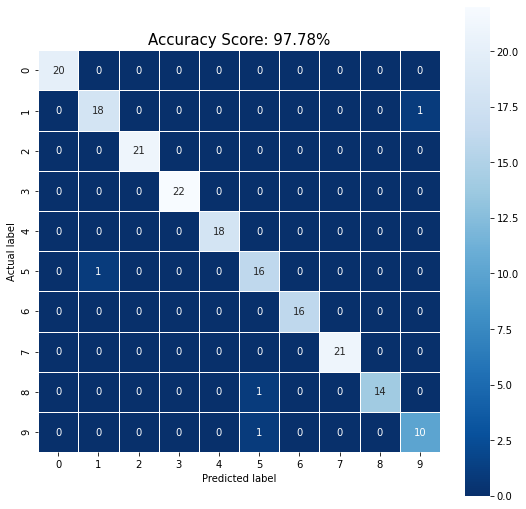

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}%".format(accuracy*100)
plt.title(all_sample_title, size = 15)

# Resolvendo o problema com Decision Tree

# Não normalizado

In [59]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(DigitsTrain, TargetTrain)

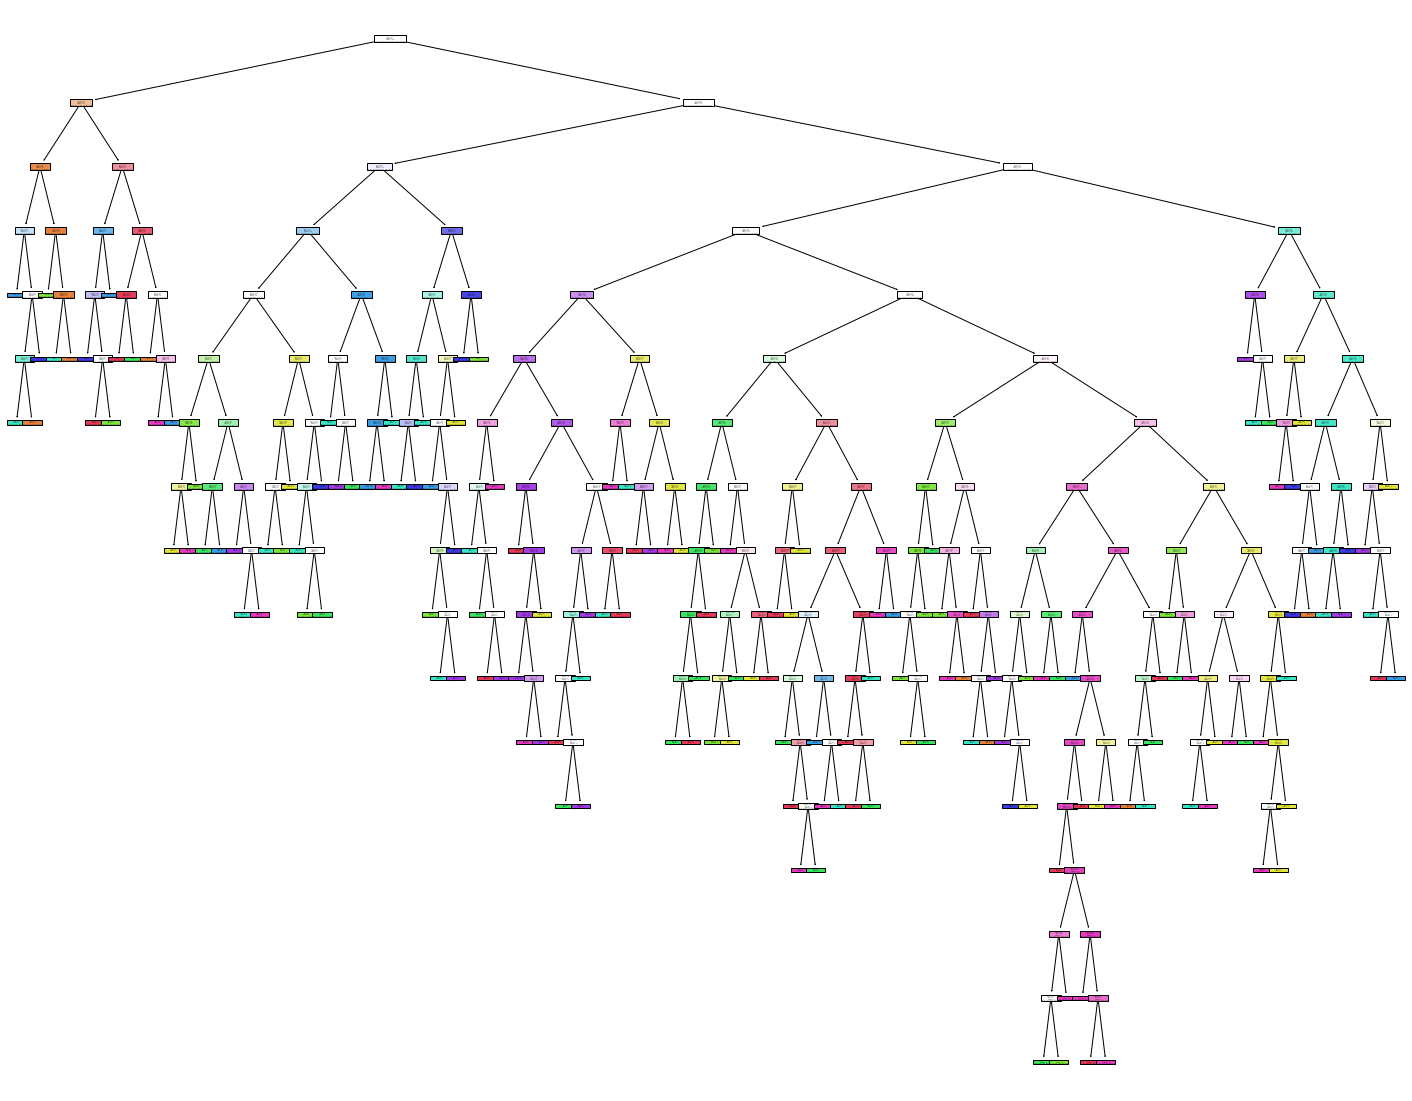

In [60]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

In [61]:
scores = cross_val_score(clf, DigitsTrain, TargetTrain, cv=6)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.87407407 0.82962963 0.85925926 0.85501859 0.81040892 0.86245353]


(0.8104089219330854, 0.848474000642526, 0.8740740740740741)

In [62]:
predictions = clf.predict(DigitsTest)

In [63]:
accuracy = clf.score(DigitsTest, TargetTest)
print("%.2f%%" % (accuracy*100))

87.78%


Text(0.5, 1.0, 'Accuracy Score: 87.78%')

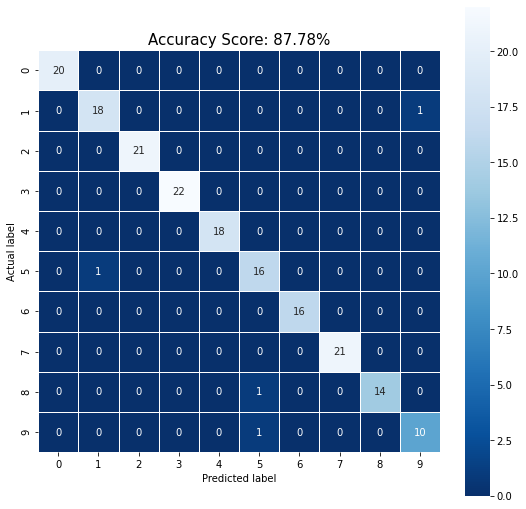

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}%".format(accuracy*100)
plt.title(all_sample_title, size = 15)

# Normalizado

In [65]:
pipe = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier(random_state=42))
pipe = pipe.fit(DigitsTrain, TargetTrain)

# Cross Validation

In [66]:
scores = cross_val_score(pipe, DigitsTrain, TargetTrain, cv=6)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.88148148 0.82962963 0.86296296 0.85130112 0.81412639 0.86245353]


(0.8141263940520446, 0.850325852494378, 0.8814814814814815)

# Predictions

In [67]:
predictions = pipe.predict(DigitsTest)

# Score

In [68]:
accuracy = pipe.score(DigitsTest, TargetTest)
print("%.2f%%" % (accuracy*100))

87.78%


# Matriz de Confusão

Text(0.5, 1.0, 'Accuracy Score: 87.78%')

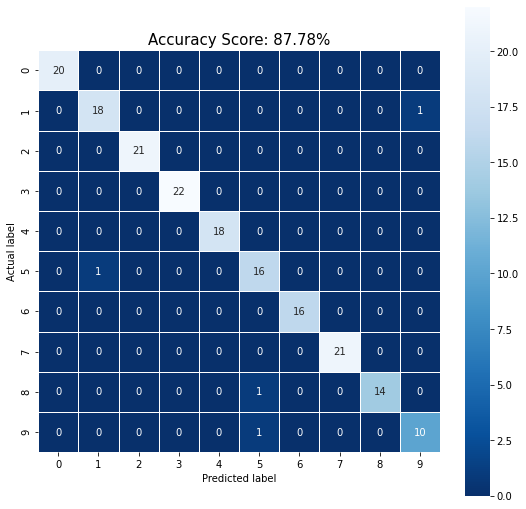

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {:.2f}%".format(accuracy*100)
plt.title(all_sample_title, size = 15)